##Voice Cloning System

In [1]:
# Import dependencies

!apt-get install -qq libportaudio2
!pip install SpeechRecognition
!pip install jiwer

import os
import sys
import librosa
import pickle

import pandas as pd
import numpy as np
import speech_recognition as sr
import soundfile as sf
from IPython.utils import io

from pathlib import Path
from jiwer import wer

I will be using the functions from the following github: https://github.com/CorentinJ/Real-Time-Voice-Cloning.git

In [2]:
!git clone https://github.com/CorentinJ/Real-Time-Voice-Cloning.git

fatal: destination path 'Real-Time-Voice-Cloning' already exists and is not an empty directory.


In [3]:
%cd Real-Time-Voice-Cloning/

/content/Real-Time-Voice-Cloning


In [4]:
!pip install numpy==1.22.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.7/235.7 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.6/676.6 kB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!ls

demo_cli.py	       README.md			 synthesizer_train.py
demo_toolbox.py        requirements.txt			 toolbox
encoder		       samples				 utils
encoder_preprocess.py  synthesizer			 vocoder
encoder_train.py       synthesizer_preprocess_audio.py	 vocoder_preprocess.py
LICENSE.md	       synthesizer_preprocess_embeds.py  vocoder_train.py


In [5]:
sys.path.append('Real_Time_Voice_Cloning')

In [6]:
from synthesizer.inference import Synthesizer
from encoder import inference as encoder
from vocoder import inference as vocoder

In [ ]:
!python demo_cli.py

In [7]:
%cd ..

/content


In [8]:
!ls

drive  Real_Time_Voice_Cloning	sample_data


In [9]:
from Real_Time_Voice_Cloning.utils.default_models import ensure_default_models
ensure_default_models(Path("pretrained_models"))

In [10]:
encoder.load_model(Path('/content/pretrained_models/default/encoder.pt'))
synthesizer = Synthesizer(Path('/content/pretrained_models/default/synthesizer.pt'))
vocoder.load_model(Path('/content/pretrained_models/default/vocoder.pt'))

Loaded encoder "encoder.pt" trained to step 1564501
Synthesizer using device: cuda
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at /content/pretrained_models/default/vocoder.pt


In [11]:
df_timit = pd.read_csv('/content/drive/MyDrive/Datasets/TIMIT_train_data.csv')

In [12]:
df_timit.head()

,index,test_or_train,dialect_region,speaker_id,filename,path_from_data_dir,path_from_data_dir_windows,is_converted_audio,is_audio,is_word_file,is_phonetic_file,is_sentence_file
0,1.0,TRAIN,DR4,MMDM0,SI681.WAV.wav,TRAIN/DR4/MMDM0/SI681.WAV.wav,TRAIN\\DR4\\MMDM0\\SI681.WAV.wav,True,True,False,False,False
1,2.0,TRAIN,DR4,MMDM0,SI1311.PHN,TRAIN/DR4/MMDM0/SI1311.PHN,TRAIN\\DR4\\MMDM0\\SI1311.PHN,False,False,False,True,False
2,3.0,TRAIN,DR4,MMDM0,SI1311.WRD,TRAIN/DR4/MMDM0/SI1311.WRD,TRAIN\\DR4\\MMDM0\\SI1311.WRD,False,False,True,False,False
3,4.0,TRAIN,DR4,MMDM0,SX321.PHN,TRAIN/DR4/MMDM0/SX321.PHN,TRAIN\\DR4\\MMDM0\\SX321.PHN,False,False,False,True,False
4,5.0,TRAIN,DR4,MMDM0,SX321.WRD,TRAIN/DR4/MMDM0/SX321.WRD,TRAIN\\DR4\\MMDM0\\SX321.WRD,False,False,True,False,False


In [13]:
df_timit.dropna(inplace = True)

In [14]:
fake_timit_path = '/content/drive/MyDrive/Datasets/TIMIT_fake3'

if not os.path.exists(fake_timit_path):
  os.makedirs(fake_timit_path)

In [15]:
wav_condition = df_timit['path_from_data_dir'].str.endswith('.wav')
df_wav = df_timit[wav_condition]
print(df_wav.head())

    index test_or_train dialect_region speaker_id        filename  \
0     1.0         TRAIN            DR4      MMDM0   SI681.WAV.wav   
6     7.0         TRAIN            DR4      MMDM0  SI1311.WAV.wav   
10   11.0         TRAIN            DR4      MMDM0   SX141.WAV.wav   
13   14.0         TRAIN            DR4      MMDM0    SX51.WAV.wav   
23   24.0         TRAIN            DR4      MMDM0   SX411.WAV.wav   

                path_from_data_dir         path_from_data_dir_windows  \
0    TRAIN/DR4/MMDM0/SI681.WAV.wav   TRAIN\\DR4\\MMDM0\\SI681.WAV.wav   
6   TRAIN/DR4/MMDM0/SI1311.WAV.wav  TRAIN\\DR4\\MMDM0\\SI1311.WAV.wav   
10   TRAIN/DR4/MMDM0/SX141.WAV.wav   TRAIN\\DR4\\MMDM0\\SX141.WAV.wav   
13    TRAIN/DR4/MMDM0/SX51.WAV.wav    TRAIN\\DR4\\MMDM0\\SX51.WAV.wav   
23   TRAIN/DR4/MMDM0/SX411.WAV.wav   TRAIN\\DR4\\MMDM0\\SX411.WAV.wav   

   is_converted_audio is_audio is_word_file is_phonetic_file is_sentence_file  
0                True     True        False            False      

In [16]:
i = np.arange(1, len(df_wav) + 1)
df_wav['i'] = i
print(df_wav)

       index test_or_train dialect_region speaker_id        filename  \
0        1.0         TRAIN            DR4      MMDM0   SI681.WAV.wav   
6        7.0         TRAIN            DR4      MMDM0  SI1311.WAV.wav   
10      11.0         TRAIN            DR4      MMDM0   SX141.WAV.wav   
13      14.0         TRAIN            DR4      MMDM0    SX51.WAV.wav   
23      24.0         TRAIN            DR4      MMDM0   SX411.WAV.wav   
...      ...           ...            ...        ...             ...   
8383  8384.0         TRAIN            DR2      MMAA0     SA1.WAV.wav   
8392  8393.0         TRAIN            DR2      MMAA0   SX305.WAV.wav   
8395  8396.0         TRAIN            DR2      MMAA0     SA2.WAV.wav   
8396  8397.0         TRAIN            DR2      MMAA0   SX125.WAV.wav   
8399  8400.0         TRAIN            DR2      MMAA0    SX35.WAV.wav   

                  path_from_data_dir         path_from_data_dir_windows  \
0      TRAIN/DR4/MMDM0/SI681.WAV.wav   TRAIN\\DR4\\MMDM0\\SI

<ipython-input-16-dd14263383e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wav['i'] = i


In [17]:
df_wav.set_index('i', inplace=True)

In [18]:
prefix = '/content/drive/MyDrive/Datasets/'
df_wav['path_from_data_dir'] = prefix + df_wav['path_from_data_dir']

<ipython-input-18-5017464a4c14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wav['path_from_data_dir'] = prefix + df_wav['path_from_data_dir']


In [19]:
df_wav = df_wav[:600]

In [20]:
def source_text(org_txt_file):
  with open (org_txt_file, 'r') as f:
    content = f.read()
  return ' '.join(content.split(' ')[2:])

In [21]:
def voice_cloning(sample_audio, text, fake_audio_path):

  original_wav, sampling_rate = librosa.load(str(sample_audio))
  preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
  embed = encoder.embed_utterance(preprocessed_wav)
  synthesizer = Synthesizer(Path("/content/pretrained_models/default/synthesizer.pt"))
  specs = synthesizer.synthesize_spectrograms([text], [embed])
  generated_wav = vocoder.infer_waveform(specs[0])
  generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")
  sf.write(fake_audio_path, generated_wav.astype(np.float32), synthesizer.sample_rate)
  return fake_audio_path

In [ ]:
with open('voice_cloning_function.pkl', 'wb') as f:
    pickle.dump(voice_cloning, f)

In [22]:
def generate_timit_fake(ind, path):
  fake_voices = []

  num_rows = len(df_wav)
  for i, p in zip(ind, path):
    print(f'index: {i}')
    print(f'original_path: {p}')
    org_audio = p

    if i > 1:
      sample_voice =  path[i - 1]
      print(f'sample_voice: {sample_voice}')
    else:
      sample_voice = path[num_rows]
      print(f'sample_voice: {sample_voice}')

    fake_audio_path = os.path.join(fake_timit_path, 'fake_'+ org_audio.split('/')[-1])
    print(f'fake audio path: {fake_audio_path}')

    org_txt_file = p.replace('.WAV.wav', '.TXT')

    text = source_text(org_txt_file)
    print(f'original_text: {text}')

    cloned_voice = voice_cloning(sample_audio = sample_voice,
                                 text = text,
                                 fake_audio_path = fake_audio_path)
    fake_voices.append(cloned_voice)

  return fake_voices

In [23]:
generate_timit_fake(df_wav.index, df_wav['path_from_data_dir'])

Streaming output truncated to the last 5000 lines.

Done.

{| ████████████████ 19000/19200 | Batch Size: 2 | Gen Rate: 1.8kHz | }index: 268
original_path: /content/drive/MyDrive/Datasets/TRAIN/DR4/MPEB0/SX60.WAV.wav
sample_voice: /content/drive/MyDrive/Datasets/TRAIN/DR4/MPEB0/SI1034.WAV.wav
fake audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX60.WAV.wav
original_text: The legislature met to judge the state of public education.

Synthesizer using device: cuda
Trainable Parameters: 30.870M
Loaded synthesizer "synthesizer.pt" trained to step 295000

| Generating 1/1


Done.

{| ████████████████ 66500/67200 | Batch Size: 7 | Gen Rate: 6.0kHz | }index: 269
original_path: /content/drive/MyDrive/Datasets/TRAIN/DR4/MPEB0/SA2.WAV.wav
sample_voice: /content/drive/MyDrive/Datasets/TRAIN/DR4/MPEB0/SX60.WAV.wav
fake audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SA2.WAV.wav
original_text: Don't ask me to carry an oily rag like that.

Synthesizer using device: cuda
Trai

['/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SI681.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SI1311.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX141.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX51.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX411.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SI1941.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX321.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SA1.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX231.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SA2.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX30.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SI750.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SI688.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX120.WAV.wav',
 '/content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX300.WAV.wav',

In [33]:
def compute_wer(path):
  wer_list = []

  for p in path:
    org_txt_file = p.replace('.WAV.wav', '.TXT')
    with open (org_txt_file, 'r') as f:
      content = f.read()
      org_text = ' '.join(content.split(' ')[2:])

    cloned_audio_path = os.path.join(fake_timit_path, 'fake_'+ p.split('/')[-1])
    print(f'cloned audio path: {cloned_audio_path}')

    audio_rec_mgr = sr.Recognizer()
    with sr.AudioFile(cloned_audio_path) as source:
      audio_data = audio_rec_mgr.record(source)
      try:
        cloned_text = audio_rec_mgr.recognize_google(audio_data, language='en-in')
      except Exception:
        print(f"Couldn't understand {cloned_audio_path} file")
    # wer = wer(reference=[org_text], hypothesis=cloned_text)
    wer_list.append(wer(reference=[org_text], hypothesis=cloned_text))
  return wer_list


In [36]:
wer_list = compute_wer(df_wav['path_from_data_dir'])

cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SI681.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SI1311.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX141.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX51.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX411.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SI1941.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX321.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SA1.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX231.WAV.wav
Couldn't understand /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX231.WAV.wav file
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SA2.WAV.wav
cloned audio path: /content/drive/MyDrive/Datasets/TIMIT_fake3/fake_SX30.WAV.wav
cloned audio p

In [46]:
print(f'word error rate is {round(np.mean(wer_list)*100,2)}%')

word error rate is 55.75%


## Fake Audio Detection

In [5]:
!pip install pydub

import pandas as pd
import numpy as np
import librosa
import os
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

from pydub import AudioSegment
from tqdm import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
cv_df = pd.read_csv('/content/drive/MyDrive/Datasets/CommonVoice.csv',delimiter='\t')

In [ ]:
cv_df

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_34925857.mp3,It is consumed domestically and exported to ot...,0,0,thirties,female,United States English,en,NaN
1,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_34925861.mp3,He was executed in a Lubyanka prison cellar.,0,0,thirties,female,United States English,en,NaN
2,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_34925867.mp3,"Rufino Street in Makati, right inside the Maka...",0,0,thirties,female,United States English,en,NaN
3,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_34925868.mp3,Its estuary is considered to have abnormally l...,0,0,thirties,female,United States English,en,NaN
4,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_34925869.mp3,He later cited his first wife Anita as the ins...,0,0,thirties,female,United States English,en,NaN
...,...,...,...,...,...,...,...,...,...,...
32888,ae9cd627e2e61a1f4fabe433d7b0030c6f861caaf80dfd...,common_voice_en_36529769.mp3,Each shura made laws and collected taxes locally.,0,0,NaN,NaN,NaN,en,NaN
32889,ae9cd627e2e61a1f4fabe433d7b0030c6f861caaf80dfd...,common_voice_en_36529770.mp3,The economy of Hanawa is primarily agricultural.,0,0,NaN,NaN,NaN,en,NaN
32890,ae9cd627e2e61a1f4fabe433d7b0030c6f861caaf80dfd...,common_voice_en_36529771.mp3,"Man...regardless of background, place of birth...",0,0,NaN,NaN,NaN,en,NaN
32891,ae9cd627e2e61a1f4fabe433d7b0030c6f861caaf80dfd...,common_voice_en_36529772.mp3,All tracks written by Ken Jordan and Scott Kir...,0,0,NaN,NaN,NaN,en,NaN


In [ ]:
with open('voice_cloning_function.pkl', 'rb') as f:
    loaded_voice_cloning = pickle.load(f)

In [ ]:
fake_cv_path = '/content/drive/MyDrive/Datasets/CV_fake'

if not os.path.exists(fake_cv_path):
  os.makedirs(fake_cv_path)

In [8]:
def convert_mp3_to_wav(mp3_file, wav_file):
    subprocess.call(["ffmpeg", "-i", mp3_file, wav_file])

In [9]:
cv_df['wav_path'] = cv_df['path'].str.replace('.mp3', '.wav')

<ipython-input-9-f2deb43f0882>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cv_df['wav_path'] = cv_df['path'].str.replace('.mp3', '.wav')


In [10]:
cv_df = cv_df[:5000]

In [11]:
for index, row in cv_df.iterrows():
    mp3_file = row['path']
    wav_file = row['wav_path']
    convert_mp3_to_wav(mp3_file, wav_file)

In [12]:
prefix = '/content/drive/MyDrive/Datasets/CommonVoice_clips/'
cv_df['wav_path'] = prefix + cv_df['wav_path']

In [ ]:
# Input folder containing .mp3 files
input_folder = '/content/drive/MyDrive/Datasets/CommonVoice_clips'

for filename in os.listdir(input_folder):
    if filename.endswith(".mp3"):
        mp3_file = os.path.join(input_folder, filename)
        wav_file = os.path.join(input_folder, os.path.splitext(filename)[0] + ".wav")

        # Convert .mp3 to .wav using pydub
        sound = AudioSegment.from_mp3(mp3_file)
        sound.export(wav_file, format="wav")

        print(f"Converted: {mp3_file} -> {wav_file}")

        # Remove the original .mp3 file
        os.remove(mp3_file)

print("Conversion and removal of .mp3 files completed.")

Conversion and removal of .mp3 files completed.


In [ ]:
def generate_cv_fake(ind, path, txt_col):
  fake_voices = []
  for i, p in zip(ind, path):
    if not os.path.exists(p):
      continue
    org_audio = p
    print(f'original audio: {org_audio}')

    for sample_path in path:
      if p != sample_path and os.path.exists(sample_path):
        sample_voice = sample_path
        print(f'sample voice: {sample_voice}')
        break

    basename = os.path.basename(p)
    fake_audio_path = os.path.join(fake_cv_path, basename.replace('wav', '_fake.wav'))
    print(f'fake audio path: {fake_audio_path}')

    org_txt = txt_col[i]
    print(f'original text: {org_txt}')

    cloned_cv_voice = loaded_voice_cloning(sample_audio = sample_voice,
                                           text = org_txt,
                                           fake_audio_path = fake_audio_path)
    fake_voices.append(cloned_cv_voice)

    print(f'length:{len(fake_voices)}')

    if len(fake_voices) == 500:
      return fake_voices

In [ ]:
cloned_voices = generate_cv_fake(cv_df.index, cv_df['wav_path'], cv_df['sentence'])

Streaming output truncated to the last 5000 lines.
{| ████████████████ 38000/38400 | Batch Size: 4 | Gen Rate: 3.4kHz | }length:143
original audio: /content/drive/MyDrive/Datasets/CommonVoice_clips/common_voice_en_34939665.wav
sample voice: /content/drive/MyDrive/Datasets/CommonVoice_clips/common_voice_en_34925857.wav
fake audio path: /content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34939665._fake.wav
original text: The mosque is constructed entirely of brick without any stone facing.
Synthesizer using device: cuda
Trainable Parameters: 30.870M
Loaded synthesizer "synthesizer.pt" trained to step 295000

| Generating 1/1


Done.

{| ████████████████ 57000/57600 | Batch Size: 6 | Gen Rate: 5.1kHz | }length:144
original audio: /content/drive/MyDrive/Datasets/CommonVoice_clips/common_voice_en_34939703.wav
sample voice: /content/drive/MyDrive/Datasets/CommonVoice_clips/common_voice_en_34925857.wav
fake audio path: /content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34939703._fake

In [ ]:
cloned_voices

['/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925857._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925868._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925869._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925878._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925881._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925887._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925890._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925919._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925920._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925921._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925925._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voice_en_34925930._fake.wav',
 '/content/drive/MyDrive/Datasets/CV_fake/common_voi

In [15]:
fake_voices = []
for p in os.listdir('/content/drive/MyDrive/Datasets/CV_fake'):
  fake_voices.append(p)

In [16]:
len(fake_voices)

500

In [18]:
def get_real(df, col):
  real_voices = []
  for i in range(len(df) - 1, -1, -1):
    p = df.iloc[i][col]
    if os.path.exists(p):
      real_voices.append(p)
    if len(real_voices) == 500:
      return real_voices

In [19]:
real = get_real(cv_df, 'wav_path')

In [20]:
len(real)

500

In [23]:
# from IPython.core.display import display, HTML
# display(HTML("<script>Jupyter.notebook.kernel.execute('config.NotebookApp.iopub_data_rate_limit = 10000000')</script>"))

In [21]:
file_column = real + fake_voices
real_column = [1] * len(real) + [0] * len(fake_voices)

# Create a DataFrame
df = pd.DataFrame({'file': file_column, 'real': real_column})

In [23]:
df = df.sample(frac=1).reset_index(drop=True)
df

,file,real
0,common_voice_en_34982757._fake.wav,0
1,common_voice_en_34937459._fake.wav,0
2,common_voice_en_34953912._fake.wav,0
3,/content/drive/MyDrive/Datasets/CommonVoice_cl...,1
4,common_voice_en_34953802._fake.wav,0
...,...,...
995,/content/drive/MyDrive/Datasets/CommonVoice_cl...,1
996,common_voice_en_34978013._fake.wav,0
997,common_voice_en_34943245._fake.wav,0
998,/content/drive/MyDrive/Datasets/CommonVoice_cl...,1


In [24]:
def update_path(path):
    if not path.startswith('/content/drive/MyDrive/Datasets/'):
        path = '/content/drive/MyDrive/Datasets/CV_fake/' + path
    return path

In [25]:
df['file'] = df['file'].apply(update_path)

**Extraxt Features**

Here, we will be using Mel-Frequency Cepstral Coefficients(MFCC) from audio samples. The MFCC summarizes the frequency distribution across the window size, so it is possible to analyze both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [26]:
def feature_extractor(files):
  audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
  mfcc_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
  mfcc_scaled_features = np.mean(mfcc_features.T, axis = 0)
  return mfcc_scaled_features

In [28]:
extracted_features = []
for index_num, row in tqdm(df.iterrows()):
  file_name = row['file']
  final_class_label = row['real']
  # print(file_name)
  # print(final_class_label)
  data = feature_extractor(file_name)
  extracted_features.append([data, final_class_label])

1000it [05:10,  3.22it/s]


In [29]:
# converting extracted features in to a dataframe

extracted_feat_df = pd.DataFrame(extracted_features, columns = ['features' , 'class'])
extracted_feat_df.head()

,features,class
0,"[-374.55545, 75.698204, -50.799873, 51.487854,...",0
1,"[-333.57712, 55.870525, -34.601223, 46.69108, ...",0
2,"[-389.0063, 57.588783, -43.601814, 56.685402, ...",0
3,"[-550.1437, 94.61369, -9.375985, 37.30068, -2....",1
4,"[-373.75378, 79.72396, -49.64181, 45.006367, -...",0


In [30]:
X = np.array(extracted_feat_df['features'].tolist())
y = np.array(extracted_feat_df['class'].tolist())

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [59]:
model = Sequential()
model.add(Dense(50, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                2050      
                                                                 
 activation_10 (Activation)  (None, 50)                0         
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 activation_11 (Activation)  (None, 50)                0         
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [61]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'],  optimizer='adam')

In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [63]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks=[early_stop])

Epoch 1/1000
25/25 [==============================] - 2s 15ms/step - loss: 18.0934 - accuracy: 0.5225 - val_loss: 1.7530 - val_accuracy: 0.5550
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 11.4166 - accuracy: 0.5987 - val_loss: 1.2259 - val_accuracy: 0.7600
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.3915 - accuracy: 0.7038 - val_loss: 0.7477 - val_accuracy: 0.8650
Epoch 4/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.4929 - accuracy: 0.7400 - val_loss: 0.1164 - val_accuracy: 0.9800
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.2081 - accuracy: 0.8037 - val_loss: 0.0689 - val_accuracy: 0.9850
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6617 - accuracy: 0.8575 - val_loss: 0.0489 - val_accuracy: 0.9900
Epoch 7/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0025 - accuracy: 0.8875 - val_loss: 0.0112 - val_accuracy: 0.9900
Epo

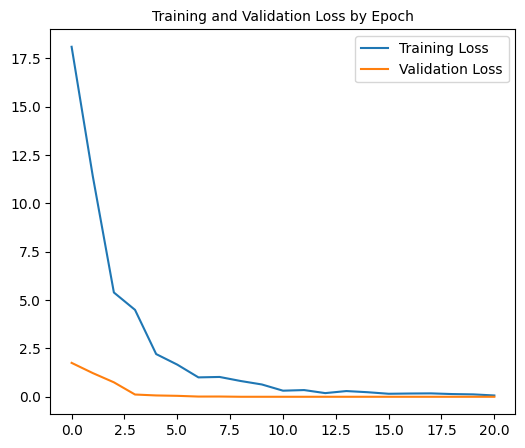

In [73]:
plt.figure(figsize=(6, 5))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss by Epoch', fontsize = 10)
plt.legend(fontsize = 10)

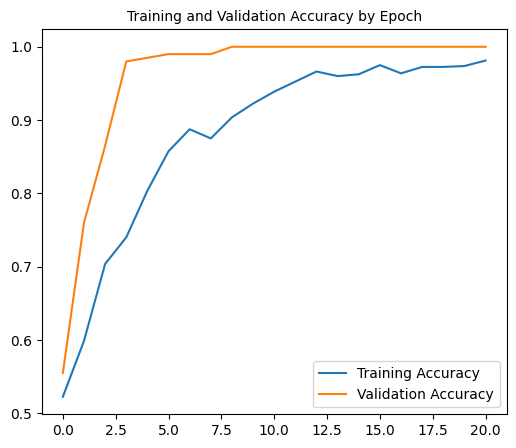

In [75]:
plt.figure(figsize=(6, 5))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch', fontsize = 10)
plt.legend(fontsize = 10)

7/7 [==============================] - 0s 5ms/step - loss: 1.2715e-06 - accuracy: 1.0000
test evaluation [1.2714839385807863e-06, 1.0]
7/7 [==============================] - 0s 5ms/step


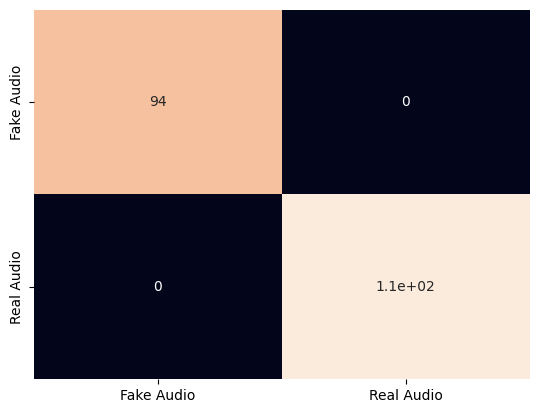

In [69]:
print('test evaluation', model.evaluate(X_test, y_test))
cm = confusion_matrix(y_test, y_pred=tf.round(model.predict(X_test)))
ax = sns.heatmap(cm, annot=True, cbar=False)

ax.xaxis.set_ticklabels(['Fake Audio', 'Real Audio'])
ax.yaxis.set_ticklabels(['Fake Audio', 'Real Audio'])

plt.show()